In [1]:
import numpy as np
import pandas as pd
import pygrgl
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/adityasyam/compgen/grg_pheno_sim') 

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals, normalize_genetic_values
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import normalize
from grg_pheno_sim.phenotype import convert_to_phen

from test_phenotype_sim.phenotype_test import test_variance


In [2]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.vcf.gz.final.grg") #loading in a sample grg stored in the same directory


In [3]:
rng = np.random.default_rng()

mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

#simulating effect sizes using just the model
num_causal = 1000  #number of causal sites

effect_sizes = model_normal.sim_effect_size(num_causal, rng)

print("Simulated Effect Sizes:", effect_sizes)

Simulated Effect Sizes: [-1.23046582e+00 -2.60026125e-01  5.61726465e-01  6.89553316e-01
 -1.94743800e+00 -4.93436903e-01 -1.95382136e+00 -2.92875863e-01
  1.44281241e-01 -5.37389092e-01 -2.34132987e-01  1.25326417e+00
 -3.34377975e-01  1.39407126e+00 -5.25088120e-01 -2.12785125e-01
  2.59327778e-01  6.42246701e-02 -9.71394258e-01  1.11048422e-01
 -1.68445568e+00 -1.98021090e-01 -2.93769827e-01  3.41272353e+00
  1.47444450e+00 -7.09763606e-01  1.25571966e+00  6.76181498e-02
  1.48209168e+00  1.95495031e+00 -8.76131334e-01 -7.15949832e-01
  6.69271004e-01 -2.67484204e-01 -3.06944527e-01  1.24037347e+00
 -2.29391378e-01 -5.47421112e-01 -1.50327629e+00  2.14557150e+00
 -2.21483051e+00 -1.08298100e+00 -2.31176258e-01 -5.05805437e-01
 -2.15677122e-01 -1.25994079e+00  1.31727301e-01 -5.05255469e-01
  7.00251600e-01 -5.68497866e-02  1.66545613e+00 -1.26890539e+00
 -4.61660356e-02 -1.95780652e+00 -7.74152291e-01  8.01192394e-01
 -1.12736043e+00  4.58025053e-01  1.31506944e-01  2.08458556e-01
 

In [4]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=num_causal, model=model_normal, random_seed=1)
sample_nodes_df = additive_effect_sizes(grg_1, trait_df_normal)

In [5]:
individual_genetic_value_df = samples_to_individuals(sample_nodes_df) #non-normalized genetic value df
individual_genetic_value_df

,individual_id,genetic_value,causal_mutation_id
0,0,-15.227789,0
1,1,-14.879777,0
2,2,11.834985,0
3,3,-3.905829,0
4,4,-20.240681,0
...,...,...,...
195,195,-9.480552,0
196,196,-5.815569,0
197,197,-20.099029,0
198,198,10.132382,0


We first show how to simulate environmental noise before the genetic values have been normalized, with a narrow-sense heritability of 0.5.

In [6]:
phenotypes = sim_env_noise(individual_genetic_value_df, h2=0.5) #simulating environmental noise without normalizing genetic values
phenotype_df = phenotypes.phenotype_df
phenotype_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-15.227789,-14.818884,-30.046673
1,0,1,-14.879777,13.758694,-1.121083
2,0,2,11.834985,0.221202,12.056188
3,0,3,-3.905829,-10.124731,-14.030560
4,0,4,-20.240681,32.809168,12.568487
...,...,...,...,...,...
195,0,195,-9.480552,16.746418,7.265866
196,0,196,-5.815569,34.327326,28.511757
197,0,197,-20.099029,-0.531428,-20.630457
198,0,198,10.132382,4.490043,14.622426


In [7]:
h2_used = phenotypes.get_h2() #showing the h2 factor used, can be acccessed since it is a class attribute of phenotypes
print(h2_used)

[0.5]


In [8]:
phenotype_df = normalize(phenotypes)
test1 = test_variance(phenotype_df)
print("Variance of the phenotypes is " + str(phenotype_df['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df['environmental_noise'].var()))
print(test1)   #tests the variance condition in the phenotypic data, expected value close to zero
phenotype_df

Variance of the phenotypes is 0.9999999999999999
Variance of the genetic values is 0.5399211572200004
Variance of the noise is 0.5941154544161433
-0.1340366116361439


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.951568,-0.798783,-1.750351
1,0,1,-0.931925,0.814208,-0.117717
2,0,2,0.575924,0.050117,0.626042
3,0,3,-0.312527,-0.533833,-0.846361
4,0,4,-1.234508,1.889465,0.654957
...,...,...,...,...,...
195,0,195,-0.627179,0.982843,0.355664
196,0,196,-0.420318,1.975154,1.554836
197,0,197,-1.226513,0.007637,-1.218876
198,0,198,0.479825,0.291062,0.770887


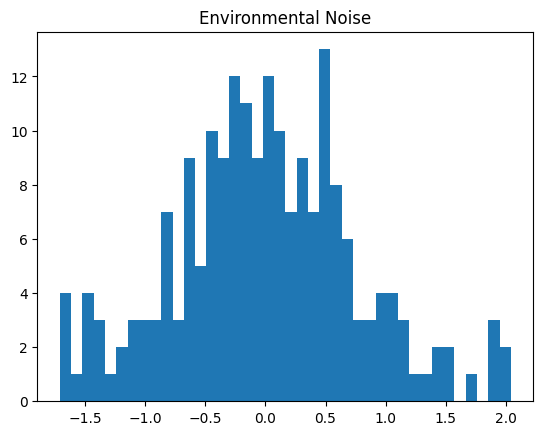

Mean of noise: -2.2204460492503132e-17
Standard deviation of noise: 0.7707888520315685


In [9]:

plt.hist(phenotype_df["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df['environmental_noise'].std()))

Now, we show a sample where zero noise is simulated (h2=1) by default.

In [10]:
phenotypes_zero_noise = sim_env_noise(individual_genetic_value_df) #simulating environmental noise without normalizing genetic values
phenotype_df_zero_noise = phenotypes_zero_noise.phenotype_df
phenotype_df_zero_noise

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-15.227789,0.0,-15.227789
1,0,1,-14.879777,0.0,-14.879777
2,0,2,11.834985,0.0,11.834985
3,0,3,-3.905829,0.0,-3.905829
4,0,4,-20.240681,0.0,-20.240681
...,...,...,...,...,...
195,0,195,-9.480552,0.0,-9.480552
196,0,196,-5.815569,0.0,-5.815569
197,0,197,-20.099029,0.0,-20.099029
198,0,198,10.132382,0.0,10.132382


In [11]:
phenotype_df_zero_noise = normalize(phenotypes_zero_noise)
print("Variance of the phenotypes is " + str(phenotype_df_zero_noise['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_zero_noise['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_zero_noise['environmental_noise'].var()))
phenotype_df_zero_noise

Variance of the phenotypes is 1.0
Variance of the genetic values is 169.4795172447372
Variance of the noise is 0.0


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-15.227789,0.0,-1.295014
1,0,1,-14.879777,0.0,-1.268282
2,0,2,11.834985,0.0,0.783791
3,0,3,-3.905829,0.0,-0.425327
4,0,4,-20.240681,0.0,-1.680075
...,...,...,...,...,...
195,0,195,-9.480552,0.0,-0.853545
196,0,196,-5.815569,0.0,-0.572022
197,0,197,-20.099029,0.0,-1.669194
198,0,198,10.132382,0.0,0.653007


In [12]:
phenotype_df_zero_noise_genetic_normalize = normalize(phenotypes_zero_noise, normalize_genetic_values=True)
print("Variance of the phenotypes is " + str(phenotype_df_zero_noise_genetic_normalize['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_zero_noise_genetic_normalize['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_zero_noise_genetic_normalize['environmental_noise'].var()))
phenotype_df_zero_noise_genetic_normalize


Variance of the phenotypes is 1.0
Variance of the genetic values is 1.0
Variance of the noise is 0.0


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-1.295014,0.0,-1.295014
1,0,1,-1.268282,0.0,-1.268282
2,0,2,0.783791,0.0,0.783791
3,0,3,-0.425327,0.0,-0.425327
4,0,4,-1.680075,0.0,-1.680075
...,...,...,...,...,...
195,0,195,-0.853545,0.0,-0.853545
196,0,196,-0.572022,0.0,-0.572022
197,0,197,-1.669194,0.0,-1.669194
198,0,198,0.653007,0.0,0.653007


Now, we simulate environmental noise before the genetic values have been normalized, with user defined noise. If user_defined is set to True, the user must specify mean and std values to be simulated from.

In [13]:
phenotype_non_normalized_user_defined = sim_env_noise(individual_genetic_value_df, user_defined=True, mean=0, std=1) #simulating standard noise on the non-normalized genetic values
phenotype_df_non_normalized_user_defined = phenotype_non_normalized_user_defined.phenotype_df
phenotype_df_non_normalized_user_defined

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-15.227789,-0.880252,-16.108042
1,0,1,-14.879777,0.970474,-13.909303
2,0,2,11.834985,1.167047,13.002032
3,0,3,-3.905829,1.256872,-2.648957
4,0,4,-20.240681,-0.734008,-20.974688
...,...,...,...,...,...
195,0,195,-9.480552,0.527763,-8.952789
196,0,196,-5.815569,0.175162,-5.640407
197,0,197,-20.099029,-1.080121,-21.179151
198,0,198,10.132382,-0.511725,9.620657


The user can choose to view the h2 narrow sense heritability factor for the user-defined noise as well.

In [14]:
h2_user_defined = phenotype_non_normalized_user_defined.get_h2()
print(h2_user_defined)

0.9990117831915347


In [15]:
phenotype_df_non_normalized_user_defined = normalize(phenotype_non_normalized_user_defined)
print("Variance of the phenotypes is " + str(phenotype_df_non_normalized_user_defined['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_non_normalized_user_defined['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_non_normalized_user_defined['environmental_noise'].var()))
phenotype_df_non_normalized_user_defined

Variance of the phenotypes is 1.0
Variance of the genetic values is 0.9930967331373826
Variance of the noise is 0.005915050054152172


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-1.290536,-0.066153,-1.356690
1,0,1,-1.263897,0.075517,-1.188379
2,0,2,0.781081,0.090565,0.871645
3,0,3,-0.423856,0.097441,-0.326416
4,0,4,-1.674266,-0.054959,-1.729225
...,...,...,...,...,...
195,0,195,-0.850594,0.041628,-0.808965
196,0,196,-0.570044,0.014637,-0.555407
197,0,197,-1.663423,-0.081453,-1.744876
198,0,198,0.650749,-0.037943,0.612806


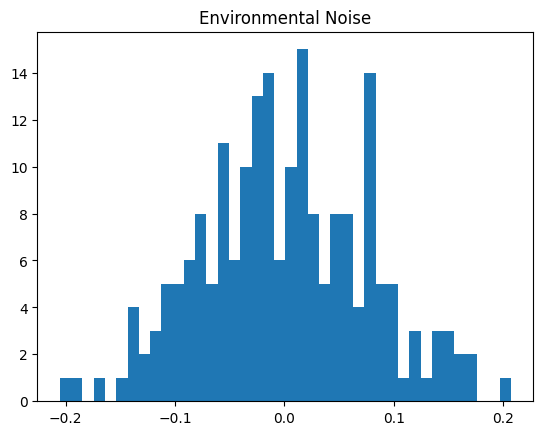

Mean of noise: 1.1102230246251566e-18
Standard deviation of noise: 0.0769093625909887


In [16]:

plt.hist(phenotype_df_non_normalized_user_defined["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df_non_normalized_user_defined['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df_non_normalized_user_defined['environmental_noise'].std()))

The user could also define a custom distribution to simulate environmental noise from.

In [17]:
genetic_val_df_normalized = normalize_genetic_values(individual_genetic_value_df) #normalized genetic value df
genetic_val_df_normalized

,individual_id,genetic_value,causal_mutation_id
0,0,-1.295014,0
1,1,-1.268282,0
2,2,0.783791,0
3,3,-0.425327,0
4,4,-1.680075,0
...,...,...,...
195,195,-0.853545,0
196,196,-0.572022,0
197,197,-1.669194,0
198,198,0.653007,0


We now show how to simulate environmental noise after the genetic values have been normalized, with a narrow-sense heritability of 0.25.

In [18]:
phenotype_post_normalization_h2 = sim_env_noise(genetic_val_df_normalized, h2=0.25) #simulating noise after genetic values have been normalized
phenotype_df_post_normalization_h2 = phenotype_post_normalization_h2.phenotype_df
phenotype_df_post_normalization_h2

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-1.295014,-0.028423,-1.323438
1,0,1,-1.268282,0.635020,-0.633261
2,0,2,0.783791,0.727431,1.511222
3,0,3,-0.425327,-0.585811,-1.011138
4,0,4,-1.680075,2.167012,0.486936
...,...,...,...,...,...
195,0,195,-0.853545,-1.228441,-2.081986
196,0,196,-0.572022,1.917681,1.345658
197,0,197,-1.669194,-0.610091,-2.279285
198,0,198,0.653007,-0.800262,-0.147255


In [19]:
phenotype_df_post_normalization_h2 = normalize(phenotype_post_normalization_h2)
print("Variance of the phenotypes is " + str(phenotype_df_post_normalization_h2['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_post_normalization_h2['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_post_normalization_h2['environmental_noise'].var()))
test3 = test_variance(phenotype_df_post_normalization_h2)
print(test3)  #tests the variance condition in the phenotypic data, expected value is close to zero
phenotype_df_post_normalization_h2

Variance of the phenotypes is 1.0
Variance of the genetic values is 0.2512213253336036
Variance of the noise is 0.6642802884412852
0.08449838622511119


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.649087,0.003278,-0.645809
1,0,1,-0.635688,0.335809,-0.299879
2,0,2,0.392851,0.382127,0.774979
3,0,3,-0.213182,-0.276095,-0.489278
4,0,4,-0.842087,1.103674,0.261587
...,...,...,...,...,...
195,0,195,-0.427814,-0.598194,-1.026008
196,0,196,-0.286709,0.978704,0.691995
197,0,197,-0.836633,-0.288265,-1.124899
198,0,198,0.327300,-0.383583,-0.056283


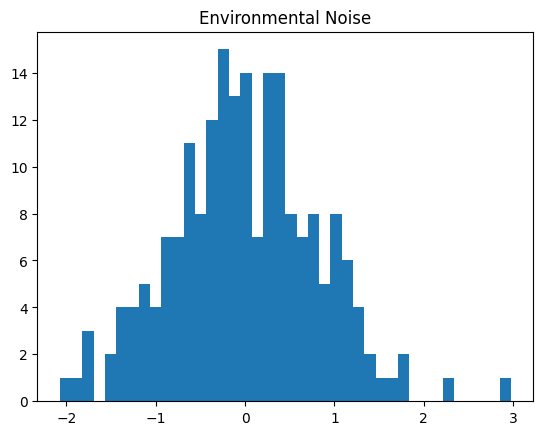

Mean of noise: 1.5543122344752193e-17
Standard deviation of noise: 0.815033918583322


In [20]:

plt.hist(phenotype_df_post_normalization_h2["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df_post_normalization_h2['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df_post_normalization_h2['environmental_noise'].std()))

We finally show how to simulate environmental noise after the genetic values have been normalized, with a narrow-sense heritability of 1 (default case) and user defined cases for the noise.

In [21]:
phenotype_post_normalization_default_mean_and_std = sim_env_noise(genetic_val_df_normalized, user_defined=True, mean=0, std=1) #simulating noise after genetic values have been normalized with h2=1 and user defined with standard mean and std
phenotype_df_post_normalization_default_mean_and_std = phenotype_post_normalization_default_mean_and_std.phenotype_df
phenotype_df_post_normalization_default_mean_and_std

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-1.295014,0.415957,-0.879057
1,0,1,-1.268282,-0.070264,-1.338545
2,0,2,0.783791,-0.166639,0.617152
3,0,3,-0.425327,-1.714270,-2.139597
4,0,4,-1.680075,-0.114233,-1.794308
...,...,...,...,...,...
195,0,195,-0.853545,0.714771,-0.138774
196,0,196,-0.572022,0.810381,0.238359
197,0,197,-1.669194,-1.954130,-3.623324
198,0,198,0.653007,-0.742191,-0.089185


In [22]:
phenotype_df_post_normalization_default_mean_and_std = normalize(phenotype_post_normalization_default_mean_and_std)
print("Variance of the phenotypes is " + str(phenotype_df_post_normalization_default_mean_and_std['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_post_normalization_default_mean_and_std['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_post_normalization_default_mean_and_std['environmental_noise'].var()))
phenotype_df_post_normalization_default_mean_and_std

Variance of the phenotypes is 1.0
Variance of the genetic values is 0.4756812834659876
Variance of the noise is 0.5240925284019556


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.893167,0.304256,-0.588910
1,0,1,-0.874730,-0.031088,-0.905818
2,0,2,0.540578,-0.097558,0.443020
3,0,3,-0.293347,-1.164953,-1.458300
4,0,4,-1.158742,-0.061414,-1.220156
...,...,...,...,...,...
195,0,195,-0.588687,0.510347,-0.078339
196,0,196,-0.394522,0.576289,0.181768
197,0,197,-1.151238,-1.330384,-2.481622
198,0,198,0.450376,-0.494514,-0.044138


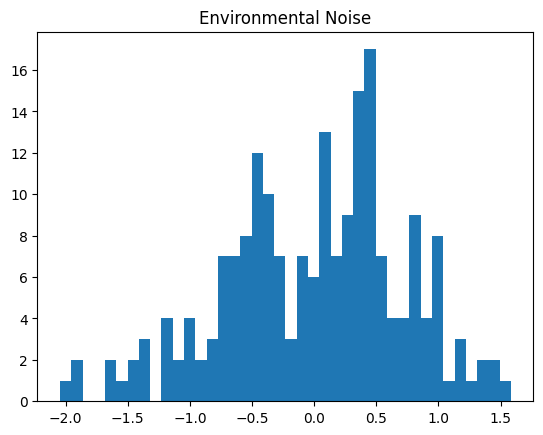

Mean of noise: -2.2204460492503132e-17
Standard deviation of noise: 0.7239423515736289


In [23]:

plt.hist(phenotype_df_post_normalization_default_mean_and_std["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df_post_normalization_default_mean_and_std['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df_post_normalization_default_mean_and_std['environmental_noise'].std()))

In [24]:
phenotype_post_normalization_unique_mean_and_std = sim_env_noise(genetic_val_df_normalized, user_defined=True, mean=1, std=2) #simulating noise after genetic values have been normalized with h2=1 and user defined mean and std
phenotype_df_post_normalization_unique_mean_and_std = phenotype_post_normalization_unique_mean_and_std.phenotype_df
phenotype_df_post_normalization_unique_mean_and_std

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-1.295014,1.669032,0.374017
1,0,1,-1.268282,-2.539292,-3.807574
2,0,2,0.783791,-2.528456,-1.744665
3,0,3,-0.425327,4.900346,4.475019
4,0,4,-1.680075,5.019339,3.339264
...,...,...,...,...,...
195,0,195,-0.853545,3.995388,3.141844
196,0,196,-0.572022,0.359377,-0.212645
197,0,197,-1.669194,4.551608,2.882414
198,0,198,0.653007,3.239911,3.892917


In [25]:
phenotype_df_post_normalization_unique_mean_and_std = normalize(phenotype_post_normalization_unique_mean_and_std)
print("Variance of the phenotypes is " + str(phenotype_df_post_normalization_unique_mean_and_std['phenotype'].var()))
print("Variance of the genetic values is " + str(phenotype_df_post_normalization_unique_mean_and_std['genetic_value'].var()))
print("Variance of the noise is " + str(phenotype_df_post_normalization_unique_mean_and_std['environmental_noise'].var()))
test5 = test_variance(phenotype_df_post_normalization_unique_mean_and_std)
phenotype_df_post_normalization_unique_mean_and_std

Variance of the phenotypes is 1.0
Variance of the genetic values is 0.18460513468854467
Variance of the noise is 0.7226702562805415


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-0.556412,0.332859,-0.223553
1,0,1,-0.544926,-1.475277,-2.020203
2,0,2,0.336761,-1.470621,-1.133860
3,0,3,-0.182745,1.721216,1.538471
4,0,4,-0.721856,1.772342,1.050486
...,...,...,...,...,...
195,0,195,-0.366731,1.332394,0.965663
196,0,196,-0.245773,-0.229843,-0.475617
197,0,197,-0.717181,1.571378,0.854197
198,0,198,0.280569,1.007798,1.288367


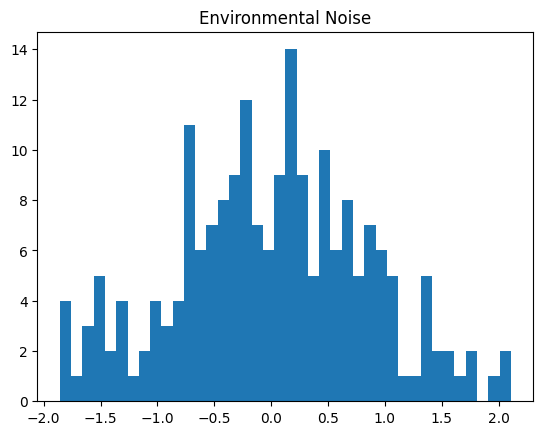

Mean of noise: 2.6645352591003756e-17
Standard deviation of noise: 0.8501001448538528


In [26]:

plt.hist(phenotype_df_post_normalization_unique_mean_and_std["environmental_noise"], bins=40)
plt.title("Environmental Noise")
plt.show()
print("Mean of noise: " + str(phenotype_df_post_normalization_unique_mean_and_std['environmental_noise'].mean()))
print("Standard deviation of noise: " + str(phenotype_df_post_normalization_unique_mean_and_std['environmental_noise'].std()))

We show an example of converting the final phenotypes output to a standard .phen file format to be saved in the local directory.

In [27]:
local_path = 'post_noise_phenotypes.phen' #will be saved in a .phen file of this name in the local directory.
convert_to_phen(phenotype_df_post_normalization_unique_mean_and_std, local_path, include_header=True)